In [143]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")

## Data Preprocessing

In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [128]:
# Load dataset
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

# Display first few rows
print(df.head())

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


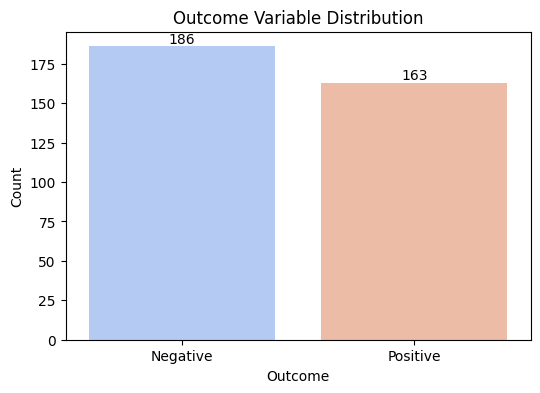

In [129]:
# Outcome Variable Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome Variable', data=df, hue='Outcome Variable', palette='coolwarm', legend=False)
plt.title('Outcome Variable Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
for container in ax.containers:
    ax.bar_label(container)  # Add count labels on bars
plt.show()

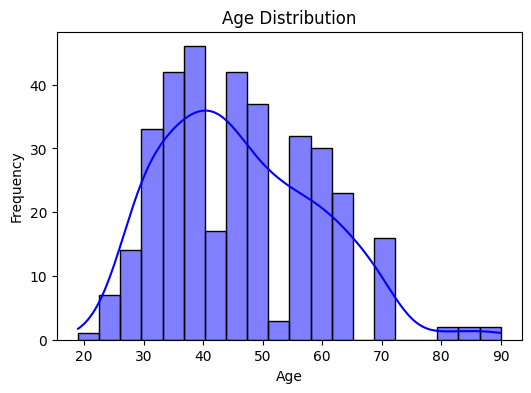

In [130]:
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

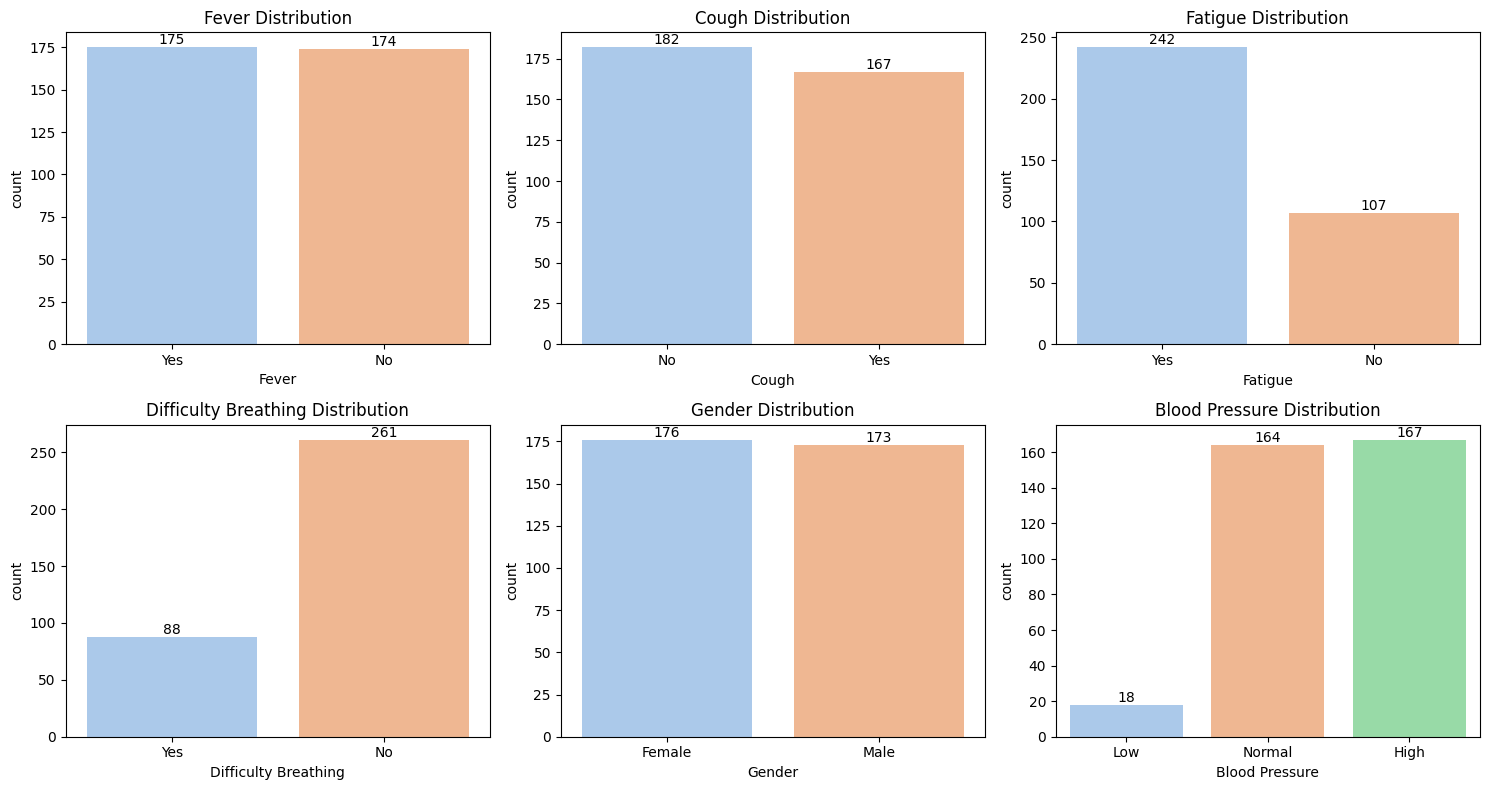

In [131]:
# Categorical Features Distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
categories = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure']

for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=cat, data=df, hue=cat, palette='pastel', ax=ax, legend=False)
    ax.set_title(f'{cat} Distribution')
    unique_values = df[cat].unique()
    ax.set_xticks(range(len(unique_values)))
    ax.set_xticklabels(unique_values)
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

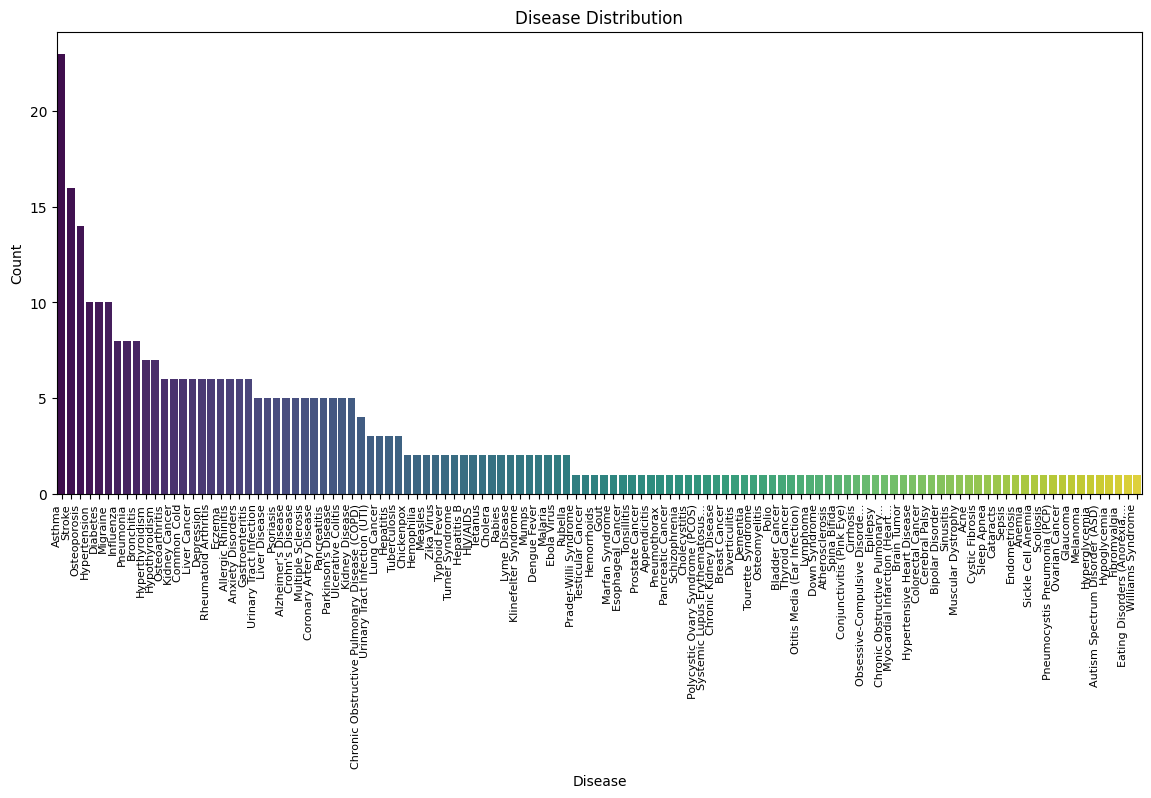

In [132]:
# Bar Plot for Disease Distribution
plt.figure(figsize=(14, 6))
disease_counts = df['Disease'].value_counts()
sns.barplot(x=disease_counts.index, y=disease_counts.values, hue=disease_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Disease Distribution')
plt.show()


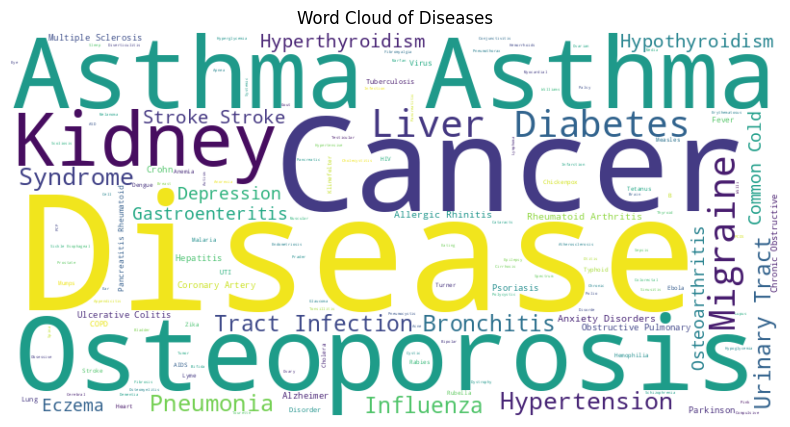

In [133]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(df['Disease'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Diseases')
plt.show()

In [134]:
categorical_cols = ['Disease','Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level']
numerical_cols = ['Age']

# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [135]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64


In [136]:
# Encoding outcome variable
df['Outcome Variable'] = df['Outcome Variable'].map({'Positive': 1, 'Negative': 0})

In [137]:
# Z-score normalization for numerical features
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [138]:
# Display cleaned dataset
print("\nCleaned Dataset Sample:")
print(df.head())


Cleaned Dataset Sample:
   Disease  Fever  Cough  Fatigue  Difficulty Breathing       Age  Gender  \
0       56      1      0        1                     1 -2.091160       0   
1       24      0      1        1                     0 -1.631964       0   
2       37      0      1        1                     0 -1.631964       0   
3        6      1      1        0                     1 -1.631964       1   
4        6      1      1        0                     1 -1.631964       1   

   Blood Pressure  Cholesterol Level  Outcome Variable  
0               1                  2                 1  
1               2                  2                 0  
2               2                  2                 0  
3               2                  2                 1  
4               2                  2                 1  


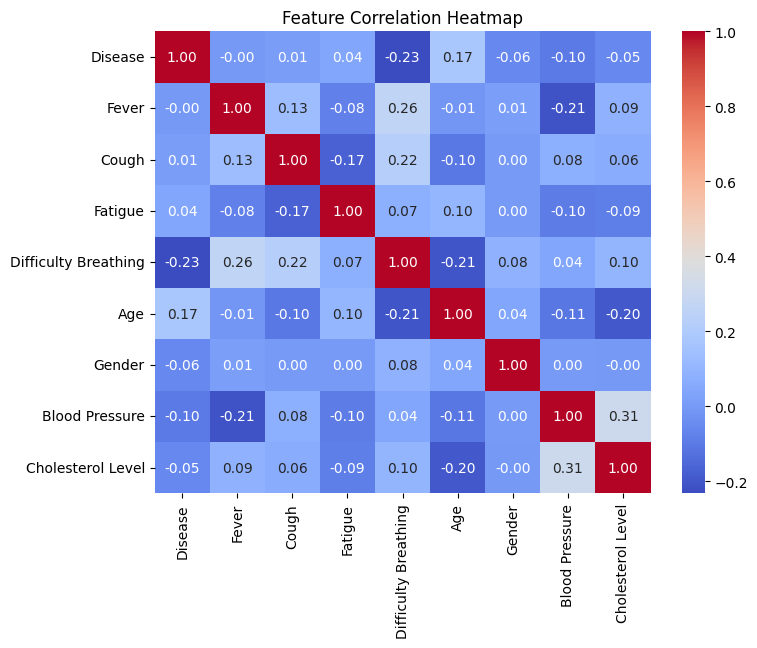

In [139]:
# Heatmap of Feature Correlations
plt.figure(figsize=(8, 6))
df_numeric = df.drop(columns=['Outcome Variable'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [140]:
# Splitting Data for Training and Testing
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

# First split: Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Test Set Size: {X_test.shape}")


Training Set Size: (279, 9)
Test Set Size: (70, 9)


## Model Training and Evaluation

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

In [142]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, eval_metric='logloss', random_state=42),
    "SVM": SVC(C=0.1, kernel='linear', probability=True, random_state=42),
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.628571   0.634146  0.702703  0.666667  0.693694
Random Forest        0.800000   0.810811  0.810811  0.810811  0.862408
Gradient Boosting    0.800000   0.810811  0.810811  0.810811  0.846847
XGBoost              0.828571   0.857143  0.810811  0.833333  0.854218
SVM                  0.614286   0.631579  0.648649  0.640000  0.724816
